<a href="https://colab.research.google.com/github/darmasatext/pyroboadvisor/blob/dev/A1_in_BMV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Agent IA - Py Robo Advisor

La idea de este proyecto personal es:


1.   Poder replicar el algoritmo de evaluación de A1 (Estrategia 1) en otras bolsas, siendo La Bolsa Mexicana de Valores la prioritaria para esto se requiere:
*   Verificar si en el servidor de Py Rodo Advisor puede correr las simulaciones para la BMV ✅
*   Ver como se puede re usar el código de la estrategia para los tickets de S&P500 pero ahora para los tickets de la BMV ✅

  *   Acomplar código para obtener los tickers de la BMV y del IPC ✅
  *   Cambio de dólares a pesos 🟨
  *   Funcionalidad para ingresar cartera actual de forma manual 🟨

2.   Implementar un agente vía ***Whatsapp (To Be Defined)*** para que pueda valuar mi portafolio con base en A1. Este último punto no se verá en este Colab. 🔜 💣 🎯



# Primero lo primero... A1 vs S&P500

Antes de poder replicar A1 en la BMV necesitamos correr A1 normal (en aras de tener un entendimiento claro del paso a paso).
Dado esta en esta sección se correrá A1

In [1]:
# @title Hora en la que empezó
import time

start_time = time.time()

In [2]:
#Instala las librerías necesarias  para hacer git clone de un repositorio
!apt-get install -y -qq git
!git clone https://github.com/daradija/pyroboadvisor.git

Cloning into 'pyroboadvisor'...
remote: Enumerating objects: 117, done.
remote: Counting objects: 100% (117/117), done.
remote: Compressing objects: 100% (87/87), done.
remote: Total 117 (delta 46), reused 91 (delta 26), pack-reused 0 (from 0)
Receiving objects: 100% (117/117), 2.25 MiB | 8.23 MiB/s, done.
Resolving deltas: 100% (46/46), done.


In [3]:
%cd pyroboadvisor
!pip install -r requirements.txt

/content/pyroboadvisor
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.9/117.9 kB 2.3 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.64
    Uninstalling yfinance-0.2.64:
      Successfully uninstalled yfinance-0.2.64


In [4]:
# Install necessary libraries
!pip install gspread google-auth

# Import necessary libraries
import gspread
from google.colab import auth
from google.auth import default

# Authenticate to Google
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

# Reemplaza 'Nombre de tu hoja de cálculo' con el título real de tu hoja de cálculo de Google.
spreadsheet_title = 'keys_pyroboadvidor'

try:
    # Abre la hoja de cálculo por su título
    sh = gc.open(spreadsheet_title)

    # Selecciona la primera hoja de trabajo (puedes cambiar 'sheet1' si necesitas otra)
    worksheet = sh.sheet1

    # Obtiene todos los valores de la hoja de trabajo como una lista de listas
    secrets = worksheet.get_all_values()

    # Imprime los datos
    print(f"Datos de la hoja de cálculo '{spreadsheet_title}':")
    for row in secrets:
        print('secrets_readed')

except gspread.SpreadsheetNotFound:
    print(f"Error: La hoja de cálculo con el título '{spreadsheet_title}' no fue encontrada.")
except Exception as e:
    print(f"Ocurrió un error: {e}")

Datos de la hoja de cálculo 'keys_pyroboadvidor':
secrets_readed
secrets_readed


Aquí se tendría que correr

```
!python3 sample.py
```

Para correr el pipiline de A1, dado que en este documento nos interesa entrar al detalle lo que haremos será pegar el código de sample.py que se encuentra en el repositorio, lo partiremos en distintos chunks para entender (y cuidar la ejecución ya que en findes el servidor de A1 tiene limitaciones por licencia para solo correr 1 vez por día la estrategia)

📥 Descargando MMM desde 2019-01-01 hasta 2025-07-04 con intervalo 1d
YF.download() has changed argument auto_adjust default to True
📥 Descargando AOS desde 2019-01-01 hasta 2025-07-04 con intervalo 1d
📥 Descargando ABT desde 2019-01-01 hasta 2025-07-04 con intervalo 1d
📥 Descargando ABBV desde 2019-01-01 hasta 2025-07-04 con intervalo 1d
📥 Descargando ACN desde 2019-01-01 hasta 2025-07-04 con intervalo 1d
📥 Descargando ADBE desde 2019-01-01 hasta 2025-07-04 con intervalo 1d
📥 Descargando AMD desde 2019-01-01 hasta 2025-07-04 con intervalo 1d
📥 Descargando AES desde 2019-01-01 hasta 2025-07-04 con intervalo 1d
📥 Descargando AFL desde 2019-01-01 hasta 2025-07-04 con intervalo 1d
📥 Descargando A desde 2019-01-01 hasta 2025-07-04 con intervalo 1d
📥 Descargando APD desde 2019-01-01 hasta 2025-07-04 con intervalo 1d
📥 Descargando ABNB desde 2019-01-01 hasta 2025-07-04 con intervalo 1d
📥 Descargando AKAM desde 2019-01-01 hasta 2025-07-04 con intervalo 1d
📥 Descargando ALB desde 2019-01-01 has

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK.B']: YFTzMissingError('possibly delisted; no timezone found')


⚠️ No se han obtenido datos para BRK.B en el rango especificado.
📥 Descargando BBY desde 2019-01-01 hasta 2025-07-04 con intervalo 1d
📥 Descargando TECH desde 2019-01-01 hasta 2025-07-04 con intervalo 1d
📥 Descargando BIIB desde 2019-01-01 hasta 2025-07-04 con intervalo 1d
📥 Descargando BLK desde 2019-01-01 hasta 2025-07-04 con intervalo 1d
📥 Descargando BX desde 2019-01-01 hasta 2025-07-04 con intervalo 1d
📥 Descargando BK desde 2019-01-01 hasta 2025-07-04 con intervalo 1d
📥 Descargando BA desde 2019-01-01 hasta 2025-07-04 con intervalo 1d
📥 Descargando BKNG desde 2019-01-01 hasta 2025-07-04 con intervalo 1d
📥 Descargando BSX desde 2019-01-01 hasta 2025-07-04 con intervalo 1d
📥 Descargando BMY desde 2019-01-01 hasta 2025-07-04 con intervalo 1d
📥 Descargando AVGO desde 2019-01-01 hasta 2025-07-04 con intervalo 1d
📥 Descargando BR desde 2019-01-01 hasta 2025-07-04 con intervalo 1d
📥 Descargando BRO desde 2019-01-01 hasta 2025-07-04 con intervalo 1d
📥 Descargando BF.B desde 2019-01-01 ha

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BF.B']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-01-01 -> 2025-07-04)')


⚠️ No se han obtenido datos para BF.B en el rango especificado.
📥 Descargando BLDR desde 2019-01-01 hasta 2025-07-04 con intervalo 1d
📥 Descargando BG desde 2019-01-01 hasta 2025-07-04 con intervalo 1d
📥 Descargando BXP desde 2019-01-01 hasta 2025-07-04 con intervalo 1d
📥 Descargando CHRW desde 2019-01-01 hasta 2025-07-04 con intervalo 1d
📥 Descargando CDNS desde 2019-01-01 hasta 2025-07-04 con intervalo 1d
📥 Descargando CZR desde 2019-01-01 hasta 2025-07-04 con intervalo 1d
📥 Descargando CPT desde 2019-01-01 hasta 2025-07-04 con intervalo 1d
📥 Descargando CPB desde 2019-01-01 hasta 2025-07-04 con intervalo 1d
📥 Descargando COF desde 2019-01-01 hasta 2025-07-04 con intervalo 1d
📥 Descargando CAH desde 2019-01-01 hasta 2025-07-04 con intervalo 1d
📥 Descargando KMX desde 2019-01-01 hasta 2025-07-04 con intervalo 1d
📥 Descargando CCL desde 2019-01-01 hasta 2025-07-04 con intervalo 1d
📥 Descargando CARR desde 2019-01-01 hasta 2025-07-04 con intervalo 1d
📥 Descargando CAT desde 2019-01-01 h

/content/pyroboadvisor/market/simulator.py:68: RuntimeWarning: invalid value encountered in divide
  intBuy=np.array(self.amount/self.pBuy, dtype=np.int16)
/content/pyroboadvisor/market/simulator.py:68: RuntimeWarning: invalid value encountered in cast
  intBuy=np.array(self.amount/self.pBuy, dtype=np.int16)


Comisión: $13.64
2020-01-21 Value: $99181 $63 APA/584 ENPH/529 EQT/2166 MRNA/805 NVDA/2715 PCG/1280 
TAE: -95.02% DDPP: 100.00%/100.00% Comisión: $0.00
2020-01-22 Value: $98447 $63 APA/584 ENPH/529 EQT/2166 MRNA/805 NVDA/2715 PCG/1280 
TAE: -94.24% DDPP: 50.00%/66.67% Comisión: $0.00
2020-01-23 Value: $99100 $63 APA/584 ENPH/529 EQT/2166 MRNA/805 NVDA/2715 PCG/1280 
TAE: -66.70% DDPP: 66.67%/66.67% Comisión: $0.00
2020-01-24 Value: $98569 $63 APA/584 ENPH/529 EQT/2166 MRNA/805 NVDA/2715 PCG/1280 
TAE: -73.13% DDPP: 50.00%/60.00% Comisión: $0.02
2020-01-27 Value: $96722 $38 APA/584 ENPH/529 EQT/2166 MRNA/805 NVDA/2715 PCG/1280 SMCI/9 
TAE: -82.41% DDPP: 20.00%/46.67% Comisión: $0.00
2020-01-28 Value: $99430 $38 APA/584 ENPH/529 EQT/2166 MRNA/805 NVDA/2715 PCG/1280 SMCI/9 
TAE: -22.94% DDPP: 100.00%/61.90% Comisión: $0.00
2020-01-29 Value: $96571 $38 APA/584 ENPH/529 EQT/2166 MRNA/805 NVDA/2715 PCG/1280 SMCI/9 
TAE: -75.70% DDPP: 14.29%/50.00% Comisión: $0.00
2020-01-30 Value: $97508 $38

/content/pyroboadvisor/market/simulator.py:68: RuntimeWarning: divide by zero encountered in divide
  intBuy=np.array(self.amount/self.pBuy, dtype=np.int16)


Comisión: $33.81
2020-02-05 Value: $101874 $20036 APA/584 EQT/2166 MRNA/805 NVDA/2715 PCG/1280 SMCI/9 
TAE: 52.76% DDPP: 100.00%/58.97% Comisión: $0.27
2020-02-06 Value: $100947 $3393 APA/584 EQT/2166 INCY/110 MRNA/805 NVDA/2715 PCG/1280 RMD/52 SMCI/9 
TAE: 22.44% DDPP: 92.31%/63.74% Comisión: $0.00
2020-02-07 Value: $103266 $3393 APA/584 EQT/2166 INCY/110 MRNA/805 NVDA/2715 PCG/1280 RMD/52 SMCI/9 
TAE: 91.90% DDPP: 100.00%/68.57% Comisión: $28.95
2020-02-10 Value: $104313 $20513 APA/584 EQT/2166 INCY/110 MRNA/805 PCG/1280 RMD/52 SMCI/9 
TAE: 108.34% DDPP: 100.00%/72.50% Comisión: $0.00
2020-02-11 Value: $102612 $20513 APA/584 EQT/2166 INCY/110 MRNA/805 PCG/1280 RMD/52 SMCI/9 
TAE: 53.39% DDPP: 87.50%/74.26% Comisión: $0.00
2020-02-12 Value: $99791 $20513 APA/584 EQT/2166 INCY/110 MRNA/805 PCG/1280 RMD/52 SMCI/9 
TAE: -3.25% DDPP: 64.71%/73.20% Comisión: $0.00
2020-02-13 Value: $100065 $20513 APA/584 EQT/2166 INCY/110 MRNA/805 PCG/1280 RMD/52 SMCI/9 
TAE: 1.00% DDPP: 66.67%/72.51% Comi

/content/pyroboadvisor/market/evaluacion.py:132: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  precio = float(ultima['Adj Close'] if 'Adj Close' in data.columns else ultima['Close'])


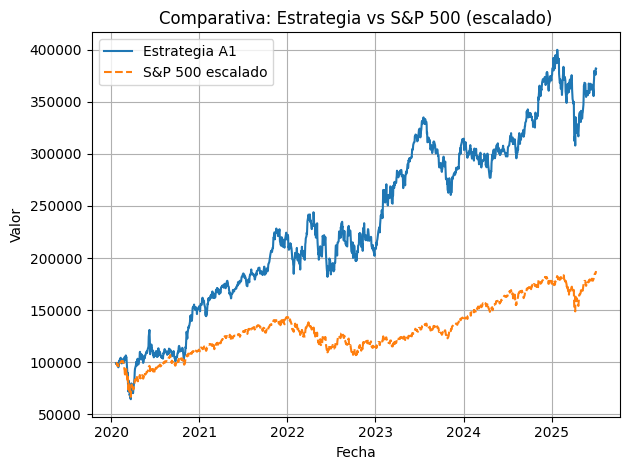

In [5]:
# Sample.py - Parte 1
from market.source import Source
from market.sourcePerDay import SourcePerDay
import numpy as np
import pandas as pd
from market.simulator import Simulator
from market.evaluacion import EstrategiaValuacionConSP500 as EstrategiaValuacion
from strategyClient import StrategyClient as Strategy

# Leer la tabla de Wikipedia
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
tablas = pd.read_html(url)
sp500 = tablas[0]  # La primera tabla es la que contiene la información

# Obtener la columna de los símbolos/tickers
tickers = sp500['Symbol'].tolist()

# partir en servicio web
# usuario y registrar uso
# El simulador se ejecuta en los dos sitios y manda hash.
today = pd.Timestamp.now().normalize()
stoday = today.strftime("%Y-%m-%d")
p={
    "fecha_inicio": "2019-01-01",
    "fecha_fin": stoday,
    "money": 100000,
    "numberStocksInPortfolio": 10,
    "orderMarginBuy": 0.005,  # margen de ordenes de compra y venta
    "orderMarginSell": 0.005,  # margen de ordenes de compra y venta
    "apalancamiento": 10 / 6,  # apalancamiento de las compras
    "ring_size": 240,
    "rlog_size": 24,
    "cabeza": 5,
    "seeds": 100,
    "percentil": 95,
    "prediccion": 5,

    "key": secrets[1][0],
    "email": secrets[1][1],
}


source=Source(
    lista_instrumentos=tickers,
    fecha_inicio=p["fecha_inicio"],
    fecha_fin=p["fecha_fin"],
    intervalo="1d"
)

sp=SourcePerDay(source)
p["tickers"]=sp.symbols

simulator=Simulator(sp.symbols)

simulator.money = p["money"]

s=Strategy(p)

ev=EstrategiaValuacion()
while True:
    orders=s.open(sp.open)
    for order in orders["programBuy"]:
        simulator.programBuy(order["id"], order["price"], order["amount"])
    for order in orders["programSell"]:
        simulator.programSell(order["id"], order["price"], order["amount"])
    s.execute(sp.low, sp.high, sp.close, sp.current)
    tasacion=simulator.execute(sp.low, sp.high, sp.close, sp.current)
    ev.add(sp.current, tasacion)
    hay=sp.nextDay()
    if not hay:
        break

ev.print()


In [6]:
# Sample.py - Parte 2

#!pip install ib_insync
#from driver.driverIB import DriverIB as Driver
#d=Driver(7497)
#d.conectar()
#s.set_profolio(d.cash(),d.profolio(sp.symbols))

#orders=s.open(source.realTime(sp.symbols))

#d.clearOrders()


In [7]:
# Sample.py - Parte 3
orders=s.open(source.realTime(sp.symbols))

print("\nComprar:")
for order in orders["programBuy"]:
    # redondea cantidad a entero y precio a 2 decimales
    precio = round(order['price'], 2)
    cantidad = int(round(order['amount']/precio))
    print(f"{cantidad} acciones de {sp.symbols[order['id']]} a {precio:.2f}")
  #  d.buy_limit(sp.symbols[order['id']], cantidad, precio)

print("\nVender:")
for order in orders["programSell"]:
    precio = order['price']
    cantidad = order['amount']/precio
    print(f"{cantidad} acciones de {sp.symbols[order['id']]} a {precio:.2f}")
 #   d.sell_limit(sp.symbols[order['id']], cantidad, precio)

📈 MMM - Current price: 152.94
📈 AOS - Current price: 67.92
📈 ABT - Current price: 134.44
📈 ABBV - Current price: 189.28
📈 ACN - Current price: 304.78
📈 ADBE - Current price: 379.31
📈 AMD - Current price: 137.91
📈 AES - Current price: 11.52
📈 AFL - Current price: 104.57
📈 A - Current price: 121.38
📈 APD - Current price: 291.84
📈 ABNB - Current price: 136.49
📈 AKAM - Current price: 79.48
📈 ALB - Current price: 67.21
📈 ARE - Current price: 76.92
📈 ALGN - Current price: 196.82
📈 ALLE - Current price: 148.11
📈 LNT - Current price: 61.53
📈 ALL - Current price: 198.0
📈 GOOGL - Current price: 179.53
📈 GOOG - Current price: 180.55
📈 MO - Current price: 59.65
📈 AMZN - Current price: 223.41
📈 AMCR - Current price: 9.63
📈 AEE - Current price: 96.02
📈 AEP - Current price: 103.86
📈 AXP - Current price: 328.13
📈 AIG - Current price: 83.18
📈 AMT - Current price: 221.75
📈 AWK - Current price: 140.05
📈 AMP - Current price: 543.3
📈 AME - Current price: 184.19
📈 AMGN - Current price: 298.24
📈 APH - Curren

In [8]:
end_time = time.time()
total_time_seconds = end_time - start_time
total_time_minutes = total_time_seconds / 60
print(f"Total execution time: {total_time_minutes:.2f} minutes")

Total execution time: 64.41 minutes


# Ahora si... A1 vs BMV

Ahora que A1 ha evaluado al S&P 500 ocupemoslo para evaluar los tickets de la BMV, lo que haremos será modificar Sample.py - Parte 1 para que vaya y consulte los tickets que están en Wikipedia como que están dados de alta en la BMV

In [9]:
# @title Hora en la que empezó
import time

start_time = time.time()

In [10]:
# Sample.py - Parte 1 (AI to BMV)

from market.source import Source
from market.sourcePerDay import SourcePerDay
import numpy as np
import pandas as pd
from market.simulator import Simulator
from market.evaluacion import EstrategiaValuacionConSP500 as EstrategiaValuacion
from strategyClient import StrategyClient as Strategy

# Leer la tabla de Wikipedia
url = 'https://w.wiki/Ebhw'
tablas = pd.read_html(url)
sp500 = tablas[1][0] # La primera tabla es la que contiene la información
#print(sp500)
tickers = sp500[1:].tolist()
#print(tickers)

bmv_df = tablas[1]

# Renombrar la columna con índice 0 a 'Symbol'
bmv_df = bmv_df.rename(columns={0: 'BMV'})

# Ahora, puedes acceder a la columna por su nombre 'Symbol'
# Y luego, seleccionar las filas a partir de la segunda (índice 1) para excluir el encabezado
# Finalmente, convertir la columna 'Symbol' a una lista.
tickers = bmv_df['BMV'].iloc[1:].tolist()
print(tickers)


['AC', 'ACCELSA', 'ACTINVR', 'AEROMEX', 'AGRIEXP', 'AGUA', 'ALEATIC', 'ALFA', 'ALPEK', 'ALSEA', 'ALTERNA', 'AMX', 'ANB', 'ARA', 'ARISTOS', 'ASUR', 'AUTLAN', 'AXTEL', 'AZTECA', 'BACHOCO', 'BAFAR', 'BBAJIO', 'BBVA', 'BEVIDES', 'BIMBO', 'BOLSA', 'BSMX', 'CABLE', 'CADU', 'CEMEX', 'CERAMIC', 'CHDRAUI', 'CIDMEGA', 'CIE', 'CMOCTEZ', 'CMR', 'COLLADO', 'CONVER', 'CREAL', 'CUERVO', 'CULTIBA', 'CYDSASA', 'DINE', 'EDOARDO', 'ELEKTRA', 'ELEMAT', 'FEMSA', 'FINAMEX', 'FINDEP', 'FORTALE', 'FRAGUA', 'FRES', 'GAP', 'GAV', 'GBM', 'GCARSO', 'GCC', 'GENTERA', 'GFAMSA', 'GFINBUR', 'GFMULTI', 'GFNORTE', 'GICSA', 'GIGANTE', 'GISSA', 'GMD', 'GMEXICO', 'GMXT', 'GNP', 'GOMO', 'GPH', 'GPROFUT', 'GRUMA', 'GSANBOR', 'HCITY', 'HERDEZ', 'HOMEX', 'HOTEL', 'IASASA', 'ICA', 'ICH', 'IDEAL', 'INGEAL', 'INVEX', 'JAVER', 'KIMBER', 'KOF', 'KUO', 'LAB', 'LACOMER', 'LALA', 'LAMOSA', 'LASEG', 'LIVEPOL', 'MEDICA', 'MEGA', 'MFRISCO', 'MINSA', 'MONEX', 'NEMAK', 'OMA', 'ORBIA', 'PASA', 'PE&OLES', 'PINFRA', 'PLANI', 'POCHTEC', 'POSA

In [11]:
#Esto puede ser un .csv dentro del mismo repo, de momento fue un copy-paste.
#Se verificó directo Vs el IPC (ticker: ^MXX)
tickers_bmv = [
    {"BMV": "AC", "Symbol": "AC.MX", "IPC": "YES"},
    {"BMV": "ACCELSA", "Symbol": "ACCELSAB.MX", "IPC": "NO"},
    {"BMV": "ACTINVR", "Symbol": "ACTINVRB.MX", "IPC": "NO"},
    {"BMV": "AEROMEX", "Symbol": "AEROMEX.MX",  "IPC": "NO"},
    #{"BMV": "AGRIEXP", "Symbol": "AGRIEXP.MX", "IPC": "NO"},  arrojó error
    #{"BMV": "AGUA", "Symbol": "AGUAK.MX"}, "IPC": "NO"}       arrojó error
    #{"BMV": "ALEATIC", "Symbol": "ALEATIC.MX", "IPC": "NO"}   arrojó error
    ##{"BMV": "ALFA", "Symbol": "ALFAA.MX", "IPC": "YES"},
    {"BMV": "ALPEK", "Symbol": "CTALPEKA.MX", "IPC": "YES"},
    {"BMV": "ALSEA", "Symbol": "ALSEA.MX", "IPC": "YES"},
    {"BMV": "ALTERNA", "Symbol": "ALTERNAB.MX", "IPC": "NO"},
    {"BMV": "AMX", "Symbol": "AMXB.MX", "IPC": "YES"},
    {"BMV": "ANB", "Symbol": "ANB.MX", "IPC": "NO"},
    {"BMV": "ARA", "Symbol": "ARA.MX", "IPC": "NO"},
    #{"BMV": "ARISTOS", "Symbol": "ARISTOS.MX", "IPC": "NO"},  arrojó error
    {"BMV": "ASUR", "Symbol": "ASURB.MX", "IPC": "YES"},
    {"BMV": "AUTLAN", "Symbol": "AUTLANB.MX", "IPC": "NO"},
    {"BMV": "AXTEL", "Symbol": "AXTELCPO.MX", "IPC": "NO"},
    #{"BMV": "AZTECA", "Symbol": "AZTECAA.MX", "IPC": "NO"},   arrojó error
    #{"BMV": "BACHOCO", "Symbol": "BACHOCOB.MX", "IPC": "NO"}, arrojó error
    {"BMV": "BAFAR", "Symbol": "BAFARB.MX", "IPC": "NO"},
    {"BMV": "BBAJIO", "Symbol": "BBAJIOO.MX", "IPC": "YES"},
    {"BMV": "BBVA", "Symbol": "BBVA.MX", "IPC": "NO"},
    #{"BMV": "BEVIDES", "Symbol": "BEVIDES.MX", "IPC": "NO"},  arrojó_error
    {"BMV": "BIMBO", "Symbol": "BIMBOA.MX", "IPC": "YES"},
    {"BMV": "BOLSA", "Symbol": "BOLSAA.MX", "IPC": "YES"},
    #{"BMV": "BSMX", "Symbol": "BSMXB.MX", "IPC": "NO"},       arrojó_error
    {"BMV": "CABLE", "Symbol": "CABLECPO.MX", "IPC": "NO"},
    #{"BMV": "CADU", "Symbol": "CADU.MX", "IPC": "NO"},        arrojó_error
    {"BMV": "CEMEX", "Symbol": "CEMEXCPO.MX", "IPC": "YES"},
    {"BMV": "CERAMIC", "Symbol": "CERAMICB.MX", "IPC": "NO"},
    {"BMV": "CHDRAUI", "Symbol": "CHDRAUIB.MX", "IPC": "YES"},
    {"BMV": "CIDMEGA", "Symbol": "CIDMEGA.MX", "IPC": "NO"},
    {"BMV": "CIE", "Symbol": "CIEB.MX", "IPC": "NO"},
    {"BMV": "CMOCTEZ", "Symbol": "CMOCTEZ.MX", "IPC": "NO"},
    {"BMV": "CMR", "Symbol": "CMRB.MX", "IPC": "NO"},
    {"BMV": "COLLADO", "Symbol": "COLLADO.MX", "IPC": "NO"},
    #{"BMV": "CONVER", "Symbol": "CONVER.MX", "IPC": "NO"},    arrojó_error
    #{"BMV": "CREAL", "Symbol": "CREALB.MX", "IPC": "NO"},     arrojó_error
    {"BMV": "CUERVO", "Symbol": "CUERVO.MX", "IPC": "YES"},
    {"BMV": "CULTIBA", "Symbol": "CULTIBAB.MX", "IPC": "NO"},
    {"BMV": "CYDSASA", "Symbol": "CYDSASAA.MX", "IPC": "NO"},
    {"BMV": "DINE", "Symbol": "DINEB.MX", "IPC": "NO"},
    #{"BMV": "EDOARDO", "Symbol": "EDOARDO.MX", "IPC": "NO"},  arrojó_error
    ##{"BMV": "ELEKTRA", "Symbol": "ELEKTRA.MX", "IPC": "YES"},
    #{"BMV": "ELEMAT", "Symbol": "ELEMENT.MX", "IPC": "NO"},   arrojó_error
    #{"BMV": "FEMSA", "Symbol": "FEMSAUBD.MX", "IPC": "YES"},
    #{"BMV": "FINAMEX", "Symbol": "FINAMEX.MX", "IPC": "NO"},  arrojó_error
    {"BMV": "FINDEP", "Symbol": "FINDEP.MX", "IPC": "NO"},
    #{"BMV": "FORTALE", "Symbol": "FORTALE.MX", "IPC": "NO"},  arrojó_error
    {"BMV": "FRAGUA", "Symbol": "FRAGUAB.MX", "IPC": "NO"},
    {"BMV": "FRES", "Symbol": "FRES.MX", "IPC": "NO"},
    {"BMV": "GAP", "Symbol": "GAPB.MX", "IPC": "YES"},
    #{"BMV": "GAV", "Symbol": "GAV.MX", "IPC": "NO"},          arrojó_error
    #{"BMV": "GBM", "Symbol": "GBMO.MX", "IPC": "NO"},         arrojó_error
    {"BMV": "GCARSO", "Symbol": "GCARSOA1.MX", "IPC": "YES"},
    {"BMV": "GCC", "Symbol": "GCC.MX", "IPC": "YES"},
    {"BMV": "GENTERA", "Symbol": "GENTERA.MX", "IPC": "YES"}, #hice un cambio
    #{"BMV": "GFAMSA", "Symbol": "GFAMSA.MX", "IPC": "NO"},    arrojó_error
    ##{"BMV": "GFINBUR", "Symbol": "GFINBURO.MX", "IPC": "YES"},
    #{"BMV": "GFMULTI", "Symbol": "GFMULTI.MX", "IPC": "NO"},  arrojó_error
    {"BMV": "GFNORTE", "Symbol": "GFNORTEO.MX", "IPC": "YES"},
    #{"BMV": "GICSA", "Symbol": "GICSA.MX", "IPC": "NO"},      arrojó_error
    {"BMV": "GIGANTE", "Symbol": "GIGANTE.MX", "IPC": "NO"},
    #{"BMV": "GISSA", "Symbol": "GISSA.MX", "IPC": "NO"},      arrojó_error
    {"BMV": "GMD", "Symbol": "GMD.MX", "IPC": "NO"},
    {"BMV": "GMEXICO", "Symbol": "GMEXICOB.MX", "IPC": "YES"},
    {"BMV": "GMXT", "Symbol": "GMXT.MX", "IPC": "NO"},
    {"BMV": "GNP", "Symbol": "GNP.MX", "IPC": "NO"},
    {"BMV": "GOMO", "Symbol": "GOMO.MX", "IPC": "NO"},
    #{"BMV": "GPH", "Symbol": "GPH.MX", "IPC": "NO"},          arrojó_error
    {"BMV": "GPROFUT", "Symbol": "GPROFUT.MX", "IPC": "NO"},
    {"BMV": "GRUMA", "Symbol": "GRUMAB.MX", "IPC": "YES"},
    #{"BMV": "GSANBOR", "Symbol": "GSANBORB.MX", "IPC": "NO"}, arrojó_error
    {"BMV": "HCITY", "Symbol": "HCITY.MX", "IPC": "NO"},
    {"BMV": "HERDEZ", "Symbol": "HERDEZ.MX", "IPC": "NO"},
    {"BMV": "HOMEX", "Symbol": "HOMEX.MX", "IPC": "NO"},
    {"BMV": "HOTEL", "Symbol": "HOTEL.MX", "IPC": "NO"},
    {"BMV": "IASASA", "Symbol": "IASASA.MX", "IPC": "NO"},
    {"BMV": "ICA", "Symbol": "ICA.MX", "IPC": "NO"},
    {"BMV": "ICH", "Symbol": "ICHB.MX", "IPC": "NO"},
    #{"BMV": "IDEAL", "Symbol": "IDEALB-1.MX", "IPC": "NO"},   arrojó_error
    #{"BMV": "INGEAL", "Symbol": "INGEAL.MX", "IPC": "NO"},    arrojó_error
    #{"BMV": "INVEX", "Symbol": "INVEX.MX", "IPC": "NO"},      arrojó_error
    {"BMV": "JAVER", "Symbol": "JAVER.MX", "IPC": "NO"},
    {"BMV": "KIMBER", "Symbol": "KIMBERA.MX", "IPC": "YES"},
    {"BMV": "KOF", "Symbol": "KOFUBL.MX", "IPC": "YES"},         #IPC_CHECK
    {"BMV": "KUO", "Symbol": "KUOB.MX", "IPC": "NO"},
    {"BMV": "LAB", "Symbol": "LABB.MX", "IPC": "YES"},
    {"BMV": "LACOMER", "Symbol": "LACOMERUBC.MX", "IPC": "YES"},  #IPC_CHECK
    #{"BMV": "LALA", "Symbol": "LALAB.MX", "IPC": "NO"},       arrojó_error
    {"BMV": "LAMOSA", "Symbol": "LAMOSA.MX", "IPC": "NO"},
    {"BMV": "LASEG", "Symbol": "LASEG.MX", "IPC": "NO"},
    {"BMV": "LIVEPOL", "Symbol": "LIVEPOLC-1.MX", "IPC": "YES"},
    {"BMV": "MEDICA", "Symbol": "MEDICAB.MX", "IPC": "NO"},
    {"BMV": "MEGA", "Symbol": "MEGACPO.MX", "IPC": "YES"},
    {"BMV": "MFRISCO", "Symbol": "MFRISCOA-1.MX", "IPC": "NO"},
    {"BMV": "MINSA", "Symbol": "MINSAB.MX", "IPC": "NO"},
    {"BMV": "MONEX", "Symbol": "MONEXB.MX", "IPC": "NO"},
    {"BMV": "NEMAK", "Symbol": "NEMAKA.MX", "IPC": "NO"},
    {"BMV": "OMA", "Symbol": "OMAB.MX", "IPC": "YES"},
    {"BMV": "ORBIA", "Symbol": "ORBIA.MX", "IPC": "YES"},
    {"BMV": "PASA", "Symbol": "PASAB.MX", "IPC": "NO"},
    {"BMV": "PE&OLES", "Symbol": "PE&OLES.MX", "IPC": "YES"},
    {"BMV": "PINFRA", "Symbol": "PINFRA.MX", "IPC": "YES"},
    {"BMV": "PLANI", "Symbol": "PLANI.MX", "IPC": "NO"},
    {"BMV": "POCHTEC", "Symbol": "POCHTECB.MX", "IPC": "NO"},
    {"BMV": "POSADAS", "Symbol": "POSADASA.MX", "IPC": "NO"},
    #{"BMV": "PROCORP", "Symbol": "PROCORP.MX", "IPC": "NO"},  arrojó_error
    {"BMV": "PV", "Symbol": "PV.MX", "IPC": "NO"},
    {"BMV": "Q", "Symbol": "Q.MX", "IPC": "YES"},
    #{"BMV": "QBINDUS", "Symbol": "QBINDUS.MX", "IPC": "NO"},  arrojó_error
    #{"BMV": "QUMMA", "Symbol": "QUMMA.MX", "IPC": "NO"},      arrojó_error
    {"BMV": "R", "Symbol": "RA.MX", "IPC": "YES"},      #IPC_CHECK
    #{"BMV": "RCENTRO", "Symbol": "RCENTROB.MX", "IPC": "NO"}, arrojó error
    {"BMV": "RLH", "Symbol": "RLHA.MX", "IPC": "NO"},
    {"BMV": "SAN", "Symbol": "SAN.MX", "IPC": "NO"},
    {"BMV": "SARE", "Symbol": "SAREB.MX", "IPC": "NO"},
    #{"BMV": "SAVIA", "Symbol": "SAVIA.MX", "IPC": "NO"},      arrojó_error
    {"BMV": "SIMEC", "Symbol": "SIMECB.MX", "IPC": "NO"},
    #{"BMV": "SITES1", "Symbol": "SITES1.MX", "IPC": "NO"},    arrojó_error
    #{"BMV": "SORIANA", "Symbol": "SORIANA.MX", "IPC": "NO"},  arrojó_error
    #{"BMV": "SPORT", "Symbol": "SPORT.MX", "IPC": "NO"},      arrojó_error
    {"BMV": "SRE", "Symbol": "SRE.MX", "IPC": "NO"},
    {"BMV": "TEAK", "Symbol": "TEAKCPO.MX", "IPC": "NO"},
    #{"BMV": "TEKCHEM", "Symbol": "TEKCHEM.MX", "IPC": "NO"},  arrojó_error
    {"BMV": "TLEVISA", "Symbol": "TLEVISACPO.MX", "IPC": "YES"},
    #{"BMV": "TMM", "Symbol": "TMM.MX", "IPC": "NO"},          arrojó_error
    {"BMV": "TRAXION", "Symbol": "TRAXIONA.MX", "IPC": "NO"},
    {"BMV": "TS", "Symbol": "TS.MX", "IPC": "NO"},
    {"BMV": "UNIFIN", "Symbol": "UNIFINA.MX", "IPC": "NO"},
    #{"BMV": "URBI", "Symbol": "URBIB.MX", "IPC": "NO"},       arrojó_error
    #{"BMV": "VALUEGF", "Symbol": "VALUEGF.MX", "IPC": "NO"},  arrojó_error
    {"BMV": "VASCONI", "Symbol": "VASCONI.MX", "IPC": "NO"},
    {"BMV": "VESTA", "Symbol": "VESTA.MX", "IPC": "YES"},
    {"BMV": "VINTE", "Symbol": "VINTE.MX", "IPC": "NO"},
    {"BMV": "VISTA", "Symbol": "VISTAA.MX", "IPC": "NO"},
    {"BMV": "VITRO", "Symbol": "VITROA.MX", "IPC": "NO"},
    ##{"BMV": "VOLAR", "Symbol": "VOLARA.MX", "IPC": "YES"},
    ##{"BMV": "WALMEX", "Symbol": "WALMEX.MX", "IPC": "YES"}
]
print(tickers_bmv)


[{'BMV': 'AC', 'Symbol': 'AC.MX', 'IPC': 'YES'}, {'BMV': 'ACCELSA', 'Symbol': 'ACCELSAB.MX', 'IPC': 'NO'}, {'BMV': 'ACTINVR', 'Symbol': 'ACTINVRB.MX', 'IPC': 'NO'}, {'BMV': 'AEROMEX', 'Symbol': 'AEROMEX.MX', 'IPC': 'NO'}, {'BMV': 'ALPEK', 'Symbol': 'CTALPEKA.MX', 'IPC': 'YES'}, {'BMV': 'ALSEA', 'Symbol': 'ALSEA.MX', 'IPC': 'YES'}, {'BMV': 'ALTERNA', 'Symbol': 'ALTERNAB.MX', 'IPC': 'NO'}, {'BMV': 'AMX', 'Symbol': 'AMXB.MX', 'IPC': 'YES'}, {'BMV': 'ANB', 'Symbol': 'ANB.MX', 'IPC': 'NO'}, {'BMV': 'ARA', 'Symbol': 'ARA.MX', 'IPC': 'NO'}, {'BMV': 'ASUR', 'Symbol': 'ASURB.MX', 'IPC': 'YES'}, {'BMV': 'AUTLAN', 'Symbol': 'AUTLANB.MX', 'IPC': 'NO'}, {'BMV': 'AXTEL', 'Symbol': 'AXTELCPO.MX', 'IPC': 'NO'}, {'BMV': 'BAFAR', 'Symbol': 'BAFARB.MX', 'IPC': 'NO'}, {'BMV': 'BBAJIO', 'Symbol': 'BBAJIOO.MX', 'IPC': 'YES'}, {'BMV': 'BBVA', 'Symbol': 'BBVA.MX', 'IPC': 'NO'}, {'BMV': 'BIMBO', 'Symbol': 'BIMBOA.MX', 'IPC': 'YES'}, {'BMV': 'BOLSA', 'Symbol': 'BOLSAA.MX', 'IPC': 'YES'}, {'BMV': 'CABLE', 'Symbo

In [12]:
# En el objeto que tiene como nombre 'tickers' vienen los nombre comunes de las empresas (por ejemplo 'AC') pero estos nombres no se encuentran dentro de la información de Yahoo Finance. Para mitigar ese error acabo de crear en la celda de arriba el objeto 'tickers_bmv' el cual contiene dos columnas que son: 'BMV' y 'Symbol'.
# Dado eso lo que quiero es que me hagas un nuevo objeto donde se haga un inner join entre 'tickers' y 'tickers_bmv'

import pandas as pd
# Crear un DataFrame a partir de la lista de diccionarios tickers_bmv
df_tickers_bmv = pd.DataFrame(tickers_bmv)

# Crear un DataFrame a partir de la lista tickers
df_tickers = pd.DataFrame(tickers, columns=['BMV'])

# Realizar el inner join
tickers_merged = pd.merge(df_tickers, df_tickers_bmv, on='BMV', how='inner')

# Filtrar el DataFrame para incluir solo donde 'IPC' es 'YES'
#tickers_merged = tickers_merged[tickers_merged['IPC'] == 'YES']


# Seleccionar solo la columna 'Symbol' y los primeros 5 registros
tickers_merged = tickers_merged['Symbol'].head(150)

# Mostrar el objeto resultante
display(tickers_merged)

,Symbol
0,AC.MX
1,ACCELSAB.MX
2,ACTINVRB.MX
3,AEROMEX.MX
4,CTALPEKA.MX
...,...
90,VASCONI.MX
91,VESTA.MX
92,VINTE.MX
93,VISTAA.MX


📥 Descargando AC.MX desde 2019-01-01 hasta 2025-07-04 con intervalo 1d
📥 Descargando ACCELSAB.MX desde 2019-01-01 hasta 2025-07-04 con intervalo 1d
📥 Descargando ACTINVRB.MX desde 2019-01-01 hasta 2025-07-04 con intervalo 1d
📥 Descargando AEROMEX.MX desde 2019-01-01 hasta 2025-07-04 con intervalo 1d
📥 Descargando CTALPEKA.MX desde 2019-01-01 hasta 2025-07-04 con intervalo 1d
📥 Descargando ALSEA.MX desde 2019-01-01 hasta 2025-07-04 con intervalo 1d
📥 Descargando ALTERNAB.MX desde 2019-01-01 hasta 2025-07-04 con intervalo 1d
📥 Descargando AMXB.MX desde 2019-01-01 hasta 2025-07-04 con intervalo 1d
📥 Descargando ANB.MX desde 2019-01-01 hasta 2025-07-04 con intervalo 1d
📥 Descargando ARA.MX desde 2019-01-01 hasta 2025-07-04 con intervalo 1d
📥 Descargando ASURB.MX desde 2019-01-01 hasta 2025-07-04 con intervalo 1d
📥 Descargando AUTLANB.MX desde 2019-01-01 hasta 2025-07-04 con intervalo 1d
📥 Descargando AXTELCPO.MX desde 2019-01-01 hasta 2025-07-04 con intervalo 1d
📥 Descargando BAFARB.MX des

/content/pyroboadvisor/market/simulator.py:68: RuntimeWarning: invalid value encountered in divide
  intBuy=np.array(self.amount/self.pBuy, dtype=np.int16)
/content/pyroboadvisor/market/simulator.py:68: RuntimeWarning: invalid value encountered in cast
  intBuy=np.array(self.amount/self.pBuy, dtype=np.int16)


Comisión: $1.99
2020-01-21 Value: $101102 $50046 CUERVO.MX/524 GCARSOA1.MX/240 VITROA.MX/413 
TAE: 5365.50% DDPP: 100.00%/100.00% Comisión: $0.10
2020-01-22 Value: $101399 $38177 CUERVO.MX/524 GAPB.MX/61 GCARSOA1.MX/240 VITROA.MX/413 
TAE: 1163.42% DDPP: 100.00%/100.00% Comisión: $1.73
2020-01-23 Value: $100675 $27580 CUERVO.MX/524 CULTIBAB.MX/1023 GAPB.MX/61 GCARSOA1.MX/240 VITROA.MX/413 
TAE: 126.95% DDPP: 33.33%/66.67% Comisión: $0.00
2020-01-24 Value: $100048 $27580 CUERVO.MX/524 CULTIBAB.MX/1023 GAPB.MX/61 GCARSOA1.MX/240 VITROA.MX/413 
TAE: 4.55% DDPP: 25.00%/50.00% Comisión: $0.00
2020-01-27 Value: $98512 $27580 CUERVO.MX/524 CULTIBAB.MX/1023 GAPB.MX/61 GCARSOA1.MX/240 VITROA.MX/413 
TAE: -54.22% DDPP: 20.00%/40.00% Comisión: $0.00
2020-01-28 Value: $98888 $27580 CUERVO.MX/524 CULTIBAB.MX/1023 GAPB.MX/61 GCARSOA1.MX/240 VITROA.MX/413 
TAE: -39.94% DDPP: 33.33%/38.10% Comisión: $0.00
2020-01-29 Value: $99993 $27580 CUERVO.MX/524 CULTIBAB.MX/1023 GAPB.MX/61 GCARSOA1.MX/240 VITROA.

/content/pyroboadvisor/market/evaluacion.py:132: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  precio = float(ultima['Adj Close'] if 'Adj Close' in data.columns else ultima['Close'])


Advertencia: para 2020-02-17, usando cotización SP500 de 2020-02-14.
Advertencia: para 2020-05-25, usando cotización SP500 de 2020-05-22.
Advertencia: para 2020-07-03, usando cotización SP500 de 2020-07-02.
Advertencia: para 2020-09-07, usando cotización SP500 de 2020-09-04.
Advertencia: para 2020-11-26, usando cotización SP500 de 2020-11-25.
Advertencia: para 2021-01-18, usando cotización SP500 de 2021-01-15.
Advertencia: para 2021-02-15, usando cotización SP500 de 2021-02-12.
Advertencia: para 2021-05-31, usando cotización SP500 de 2021-05-28.
Advertencia: para 2021-07-05, usando cotización SP500 de 2021-07-02.
Advertencia: para 2021-09-06, usando cotización SP500 de 2021-09-03.
Advertencia: para 2021-11-25, usando cotización SP500 de 2021-11-24.
Advertencia: para 2021-12-24, usando cotización SP500 de 2021-12-23.
Advertencia: para 2022-01-17, usando cotización SP500 de 2022-01-14.
Advertencia: para 2022-02-21, usando cotización SP500 de 2022-02-18.
Advertencia: para 2022-05-30, usan

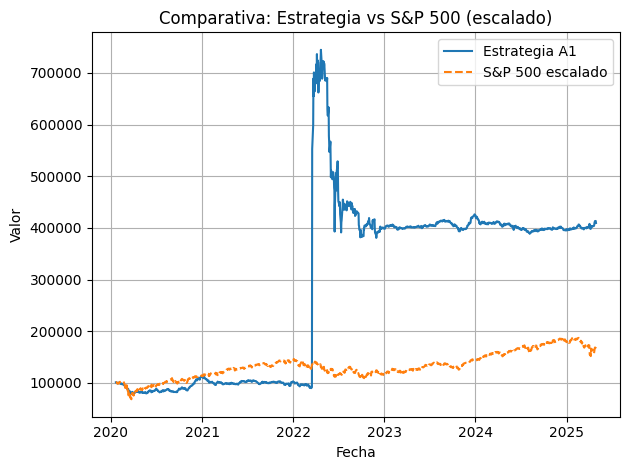

In [13]:
### empieza el debuggeo

# partir en servicio web
# usuario y registrar uso
# El simulador se ejecuta en los dos sitios y manda hash.
today = pd.Timestamp.now().normalize()
stoday = today.strftime("%Y-%m-%d")
p={
    "fecha_inicio": "2019-01-01",
    "fecha_fin": stoday,
    "money": 100000,
    "numberStocksInPortfolio": 10,
    "orderMarginBuy": 0.005,  # margen de ordenes de compra y venta
    "orderMarginSell": 0.005,  # margen de ordenes de compra y venta
    "apalancamiento": 10 / 6,  # apalancamiento de las compras
    "ring_size": 240,
    "rlog_size": 24,
    "cabeza": 5,
    "seeds": 100,
    "percentil": 95,
    "prediccion": 5,

   "key": secrets[1][0],
    "email": secrets[1][1],
}


source=Source(
    lista_instrumentos=tickers_merged.tolist(), # Usamos la lista de tickers fusionados y filtrados
    fecha_inicio=p["fecha_inicio"],
    fecha_fin=p["fecha_fin"],
    intervalo="1d"
)


sp=SourcePerDay(source)
p["tickers"]=sp.symbols

simulator=Simulator(sp.symbols)

simulator.money = p["money"]

s=Strategy(p)

ev=EstrategiaValuacion()
while True:
    orders=s.open(sp.open)
    for order in orders["programBuy"]:
        simulator.programBuy(order["id"], order["price"], order["amount"])
    for order in orders["programSell"]:
        simulator.programSell(order["id"], order["price"], order["amount"])
    s.execute(sp.low, sp.high, sp.close, sp.current)
    tasacion=simulator.execute(sp.low, sp.high, sp.close, sp.current)
    ev.add(sp.current, tasacion)
    hay=sp.nextDay()
    if not hay:
        break

ev.print()

/content/pyroboadvisor/market/simulator.py:68: RuntimeWarning: invalid value encountered in divide
  intBuy=np.array(self.amount/self.pBuy, dtype=np.int16)
/content/pyroboadvisor/market/simulator.py:68: RuntimeWarning: invalid value encountered in cast
  intBuy=np.array(self.amount/self.pBuy, dtype=np.int16)


Comisión: $1.99
2020-01-21 Value: $101102 $50046 CUERVO.MX/524 GCARSOA1.MX/240 VITROA.MX/413 
TAE: 5365.50% DDPP: 100.00%/100.00% Comisión: $0.10
2020-01-22 Value: $101399 $38177 CUERVO.MX/524 GAPB.MX/61 GCARSOA1.MX/240 VITROA.MX/413 
TAE: 1163.42% DDPP: 100.00%/100.00% Comisión: $1.73
2020-01-23 Value: $100675 $27580 CUERVO.MX/524 CULTIBAB.MX/1023 GAPB.MX/61 GCARSOA1.MX/240 VITROA.MX/413 
TAE: 126.95% DDPP: 33.33%/66.67% Comisión: $0.00
2020-01-24 Value: $100048 $27580 CUERVO.MX/524 CULTIBAB.MX/1023 GAPB.MX/61 GCARSOA1.MX/240 VITROA.MX/413 
TAE: 4.55% DDPP: 25.00%/50.00% Comisión: $0.00
2020-01-27 Value: $98512 $27580 CUERVO.MX/524 CULTIBAB.MX/1023 GAPB.MX/61 GCARSOA1.MX/240 VITROA.MX/413 
TAE: -54.22% DDPP: 20.00%/40.00% Comisión: $0.00
2020-01-28 Value: $98888 $27580 CUERVO.MX/524 CULTIBAB.MX/1023 GAPB.MX/61 GCARSOA1.MX/240 VITROA.MX/413 
TAE: -39.94% DDPP: 33.33%/38.10% Comisión: $0.00
2020-01-29 Value: $99993 $27580 CUERVO.MX/524 CULTIBAB.MX/1023 GAPB.MX/61 GCARSOA1.MX/240 VITROA.

/content/pyroboadvisor/market/evaluacion.py:132: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  precio = float(ultima['Adj Close'] if 'Adj Close' in data.columns else ultima['Close'])


Advertencia: para 2020-09-07, usando cotización SP500 de 2020-09-04.
Advertencia: para 2020-11-26, usando cotización SP500 de 2020-11-25.
Advertencia: para 2021-01-18, usando cotización SP500 de 2021-01-15.
Advertencia: para 2021-02-15, usando cotización SP500 de 2021-02-12.
Advertencia: para 2021-05-31, usando cotización SP500 de 2021-05-28.
Advertencia: para 2021-07-05, usando cotización SP500 de 2021-07-02.
Advertencia: para 2021-09-06, usando cotización SP500 de 2021-09-03.
Advertencia: para 2021-11-25, usando cotización SP500 de 2021-11-24.
Advertencia: para 2021-12-24, usando cotización SP500 de 2021-12-23.
Advertencia: para 2022-01-17, usando cotización SP500 de 2022-01-14.
Advertencia: para 2022-02-21, usando cotización SP500 de 2022-02-18.
Advertencia: para 2022-05-30, usando cotización SP500 de 2022-05-27.
Advertencia: para 2022-06-20, usando cotización SP500 de 2022-06-17.
Advertencia: para 2022-07-04, usando cotización SP500 de 2022-07-01.
Advertencia: para 2022-09-05, usan

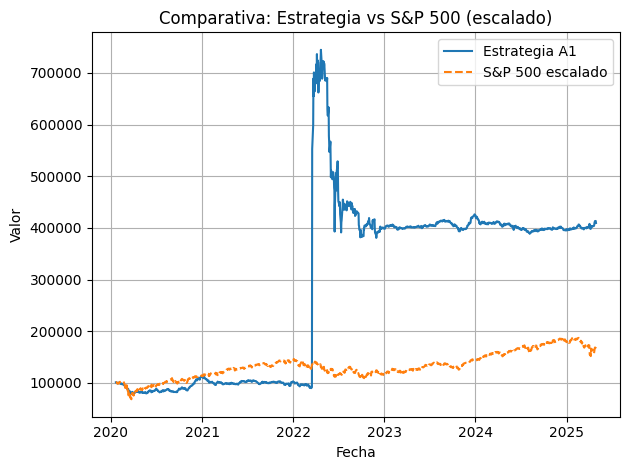

In [14]:
sp=SourcePerDay(source)
p["tickers"]=sp.symbols

simulator=Simulator(sp.symbols)

simulator.money = p["money"]

s=Strategy(p)

ev=EstrategiaValuacion()
while True:
    orders=s.open(sp.open)
    for order in orders["programBuy"]:
        simulator.programBuy(order["id"], order["price"], order["amount"])
    for order in orders["programSell"]:
        simulator.programSell(order["id"], order["price"], order["amount"])
    s.execute(sp.low, sp.high, sp.close, sp.current)
    tasacion=simulator.execute(sp.low, sp.high, sp.close, sp.current)
    ev.add(sp.current, tasacion)
    hay=sp.nextDay()
    if not hay:
        break

ev.print()

### termina el debuggeo

In [15]:
# Sample.py - Parte 2

#!pip install ib_insync
#from driver.driverIB import DriverIB as Driver
#d=Driver(7497)
#d.conectar()
#s.set_profolio(d.cash(),d.profolio(sp.symbols))

#orders=s.open(source.realTime(sp.symbols))

#d.clearOrders()

In [16]:
orders=s.open(source.realTime(sp.symbols))

#d.clearOrders()

print("\nComprar:")
for order in orders["programBuy"]:
    # redondea cantidad a entero y precio a 2 decimales
    precio = round(order['price'], 2)
    cantidad = int(round(order['amount']/precio))
    print(f"{cantidad} acciones de {sp.symbols[order['id']]} a {precio:.2f}")
   # d.buy_limit(sp.symbols[order['id']], cantidad, precio)

print("\nVender:")
for order in orders["programSell"]:
    precio = order['price']
    cantidad = order['amount']/precio
    print(f"{cantidad} acciones de {sp.symbols[order['id']]} a {precio:.2f}")
   # d.sell_limit(sp.symbols[order['id']], cantidad, precio)

📈 AC.MX - Current price: 198.48
📈 ACCELSAB.MX - Current price: 22.5
📈 ACTINVRB.MX - Current price: 18.7
📈 AEROMEX.MX - Current price: 167.0
📈 CTALPEKA.MX - Current price: 3.18
📈 ALSEA.MX - Current price: 50.49
📈 ALTERNAB.MX - Current price: 1.55
📈 AMXB.MX - Current price: 16.93
📈 ANB.MX - Current price: 1291.0
📈 ARA.MX - Current price: 3.31
📈 ASURB.MX - Current price: 600.0
📈 AUTLANB.MX - Current price: 6.81
📈 AXTELCPO.MX - Current price: 2.39
📈 BAFARB.MX - Current price: 90.6
📈 BBAJIOO.MX - Current price: 45.71
📈 BBVA.MX - Current price: 293.0
📈 BIMBOA.MX - Current price: 52.06
📈 BOLSAA.MX - Current price: 42.92
📈 CABLECPO.MX - Current price: 55.0
📈 CEMEXCPO.MX - Current price: 13.41
📈 CERAMICB.MX - Current price: 96.0
📈 CHDRAUIB.MX - Current price: 149.75
📈 CIDMEGA.MX - Current price: 30.45
📈 CIEB.MX - Current price: 33.38
📈 CMOCTEZ.MX - Current price: 81.0
📈 CMRB.MX - Current price: 1.68
📈 COLLADO.MX - Current price: 7.8
📈 CUERVO.MX - Current price: 23.11
📈 CULTIBAB.MX - Current pri

In [17]:
end_time = time.time()
total_time_seconds = end_time - start_time
total_time_minutes = total_time_seconds / 60
print(f"Total execution time: {total_time_minutes:.2f} minutes")

Total execution time: 107.01 minutes
